### 교차 검증

- 테스트 데이터에 과대적합(Overfitting) 되는 부분 해결
- 부족한 데이터에서 검증 데이터 추출이 어려움
- 해결방안
    * 기존 데이터를 일정 크기로 균등하게 나눔
    * 나눈 데이터가 n개 인 경우 1/n => 검증,  n-1/n => 훈련용 
    * 매번 동일한 데이터로 훈련 및 검증하지 않도록 해줌
    * 단점) 데이터가 많거나 하는 경우 시간이 오래 걸림

### 교차검증

#### [1] 데이터 준비

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LinearRegression

In [16]:
filename='../../data/iris.csv'

In [17]:
irisDF=pd.read_csv(filename)

### [2] 데이터 확인

In [18]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
irisDF.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### [3] 데이터 가공

In [20]:
# [3-1]petal.length, petal.width 준비 => 특성 데이터와 타겟 데이터 준비 
irisDF.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [21]:
data=irisDF['petal.width']
target=irisDF['petal.length']

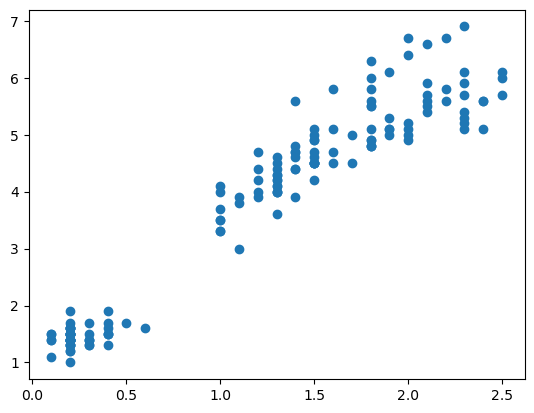

In [22]:
import matplotlib.pyplot as plt
plt.scatter(data, target)

In [23]:
# [3-2] 훈련용과 테스트용 데이터 분리
train_X, test_X, train_y, test_y = train_test_split(data, target, 
                                                    random_state=10,
                                                    stratify=irisDF.variety)

In [24]:
train_X = train_X.to_frame()
test_X = test_X.to_frame()

In [25]:
train_X.shape, train_y.shape, type(train_X)

((112, 1), (112,), pandas.core.frame.DataFrame)

In [26]:
test_X.shape, test_y.shape, type(test_X)

((38, 1), (38,), pandas.core.frame.DataFrame)

### [4]  교차검증 학습 

In [28]:
from sklearn.linear_model import Ridge, Lasso

In [30]:
# [4-1] 학습 모델 객체 생성
lr=Ridge()

In [31]:
# [4-2] 교차검증 진행
result=cross_validate(lr, 
                      train_X, train_y, 
                      return_estimator=True, 
                      return_train_score=True)

In [32]:
for key, item in result.items():
    print(key, "=> ", item)

fit_time =>  [0.00916696 0.0013895  0.00099635 0.00099277 0.00100732]
score_time =>  [0.0010047  0.00101113 0.00099778 0.00100112 0.00099206]
estimator =>  [Ridge(), Ridge(), Ridge(), Ridge(), Ridge()]
test_score =>  [0.85818042 0.963229   0.94553111 0.88966653 0.93487627]
train_score =>  [0.93969143 0.91522636 0.92154555 0.92939379 0.92274277]


In [33]:
# [4-2] 교차검증 진행
result2=cross_validate(lr,
                       train_X, 
                       train_y, 
                       return_estimator=True, 
                       return_train_score=True,
                       cv=10)

In [34]:
for key, item in result2.items():
    print(key, "=> ", item)

fit_time =>  [0.00199795 0.00100112 0.00099158 0.00099969 0.00101018 0.00100565
 0.00099993 0.0009985  0.         0.0010035 ]
score_time =>  [0.         0.         0.00099921 0.         0.00099349 0.
 0.00099564 0.00099945 0.00099969 0.00099707]
estimator =>  [Ridge(), Ridge(), Ridge(), Ridge(), Ridge(), Ridge(), Ridge(), Ridge(), Ridge(), Ridge()]
test_score =>  [0.81198033 0.88807172 0.95315022 0.97623344 0.95896553 0.91124556
 0.88886822 0.90725697 0.95410475 0.91279231]
train_score =>  [0.93511922 0.92910082 0.92219252 0.92018352 0.92109077 0.92645471
 0.9286082  0.92569518 0.92139584 0.9275195 ]


- CV Splitter 객체 생성 후 적용

In [35]:
# 커스텀 CV 분리객체 생성 사용 
skFold=KFold(n_splits=10, shuffle=True, random_state=11)

skFold2=StratifiedKFold(n_splits=10, shuffle=True, random_state=11)

In [36]:
# [4-2] 교차검증 진행
result3=cross_validate(lr,
                       train_X, 
                       train_y, 
                       return_estimator=True, 
                       return_train_score=True, 
                       cv=skFold)

In [37]:
for key, item in result3.items():
    print(key, "=> ", item)

fit_time =>  [0.00299931 0.00100064 0.0010004  0.00100088 0.00099945 0.00103998
 0.00099969 0.00099969 0.0010004  0.0010016 ]
score_time =>  [0.00100064 0.00099897 0.00099945 0.00141025 0.         0.00100017
 0.0010066  0.         0.00099993 0.        ]
estimator =>  [Ridge(), Ridge(), Ridge(), Ridge(), Ridge(), Ridge(), Ridge(), Ridge(), Ridge(), Ridge()]
test_score =>  [0.9276309  0.9396455  0.85191393 0.9452524  0.93689758 0.95247754
 0.89486805 0.30102322 0.96658585 0.92038613]
train_score =>  [0.9247107  0.92408802 0.93228359 0.92279617 0.92454173 0.92186877
 0.92792314 0.93453241 0.91837595 0.92564818]
